In [1]:
import time
import data_loader
import train_test_matrix
from u_feature import add_user_features
from u_feature import add_user_1111_features
from m_feature import add_merchant_features
from m_feature import add_merchant_1111_features
from c_feature import add_category_features
from c_feature import add_category_1111_features
from b_feature import add_brand_features
from b_feature import add_brand_1111_features
from um_feature import add_user_merchant_features
from um_feature import add_user_merchant_cart_purchase_interval
from mc_feature import add_merchant_category_features
from mb_feature import add_merchant_brand_features
from pytorch_graph_feature import add_pytorch_graph_embedding_features
from pytorch_hetero_graph_feature import add_pytorch_hetero_graph_embedding_features
from model_ensemble import add_cross_features
from model_ensemble import add_model_ensemble_features
from rfm_repurchase_feature import add_rfm_and_repurchase_features
from feature_select import select_features
from corr_check import drop_high_corr_features
from helper import remove_original_columns_if_binned
import model

import lightgbm as lgb
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
pd.set_option('display.max_columns', None)

In [3]:
origin_data = data_loader.DataLoader('../data/')
origin_data.init_data()

In [4]:
matrix = train_test_matrix.TrainTestMatrix(origin_data)
matrix.init_matrix()

In [5]:
# add_cross_features(matrix, origin_data)

In [6]:
add_rfm_and_repurchase_features(matrix, origin_data)
# 删除M列
matrix.train_test_matrix.drop(['M'], axis=1, inplace=True)

In [7]:
add_model_ensemble_features(matrix, origin_data)

/home/jason/Data/Code/CS182/project/baseline/6881.back/model_ensemble.py:91: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = X[col].astype('object')
/home/jason/Data/Code/CS182/project/baseline/6881.back/model_ensemble.py:92: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[col] = X_test[col].astype('object')
/home/jason/Data/Code/CS182/project/baseline/6881.back/model_ensemble.py:96: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

Processing fold 1/5


/home/jason/anaconda3/envs/cs182/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [02:19:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Processing fold 2/5


/home/jason/anaconda3/envs/cs182/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [02:19:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Processing fold 3/5


/home/jason/anaconda3/envs/cs182/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [02:19:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Processing fold 4/5


/home/jason/anaconda3/envs/cs182/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [02:20:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Processing fold 5/5


/home/jason/anaconda3/envs/cs182/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [02:20:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [8]:
add_user_features(matrix, origin_data)
add_user_1111_features(matrix, origin_data)
add_merchant_features(matrix, origin_data)
add_merchant_1111_features(matrix, origin_data)
add_category_features(matrix, origin_data)
add_category_1111_features(matrix, origin_data)
add_brand_features(matrix, origin_data)
add_brand_1111_features(matrix, origin_data)
add_user_merchant_features(matrix, origin_data)
add_user_merchant_cart_purchase_interval(matrix, origin_data)
add_merchant_category_features(matrix, origin_data)
add_merchant_brand_features(matrix, origin_data)

In [9]:
add_pytorch_graph_embedding_features(matrix, origin_data)

Using device: cuda


OutOfMemoryError: CUDA out of memory. Tried to allocate 6.55 GiB. GPU 0 has a total capacity of 15.89 GiB of which 4.65 GiB is free. Process 2778624 has 4.84 GiB memory in use. Process 2795589 has 5.06 GiB memory in use. Including non-PyTorch memory, this process has 1.34 GiB memory in use. Of the allocated memory 951.01 MiB is allocated by PyTorch, and 128.99 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

In [ ]:
add_pytorch_hetero_graph_embedding_features(matrix, origin_data, epochs=170)

节点映射已完成。
节点特征已初始化。
User->Merchant 边已添加。
Merchant->Category 边已添加。
Merchant->Brand 边已添加。
Merchant->Item 边已添加。
User->User 自连接边已添加。
所有边类型已添加： [('user', 'buys', 'merchant'), ('merchant', 'has', 'category'), ('merchant', 'has', 'brand'), ('merchant', 'contains', 'item'), ('user', 'self', 'user')]
异质图模型已定义。
Hetero Graph device: cuda
模型和优化器已初始化。
开始训练模型...
Epoch 1, Loss: 5.8123
Epoch 10, Loss: 3.8469
Epoch 20, Loss: 2.7557
Epoch 30, Loss: 2.0595
Epoch 40, Loss: 1.5942
Epoch 50, Loss: 1.2827
Epoch 60, Loss: 1.0385
Epoch 70, Loss: 0.8260
Epoch 80, Loss: 0.6389
Epoch 90, Loss: 0.4691
Epoch 100, Loss: 0.3383
Epoch 110, Loss: 0.2316
Epoch 120, Loss: 0.1532
Epoch 130, Loss: 0.0993
Epoch 140, Loss: 0.0660
Epoch 150, Loss: 0.0462
Epoch 160, Loss: 0.0341
Epoch 170, Loss: 0.0265
模型训练完成。
节点嵌入已生成。
嵌入 DataFrame 已生成。
嵌入特征已合并回矩阵。
嵌入特征已进行截断和分箱。
缺失值已填充。
Heterogeneous graph embedding features added.


In [ ]:
# If min and max are the same, it means the feature is constant
# Remove those features
for col in matrix.train_test_matrix.columns:    
    if matrix.train_test_matrix[col].dtype == 'object' \
        or matrix.train_test_matrix[col].dtype == 'category':
        continue
    if matrix.train_test_matrix[col].max() == matrix.train_test_matrix[col].min():
        matrix.train_test_matrix.drop(col, axis=1, inplace=True)

In [ ]:
# Remove nan columns
matrix.train_test_matrix.dropna(axis=1, how='all', inplace=True)

In [ ]:
matrix.train_test_matrix = remove_original_columns_if_binned(matrix.train_test_matrix)

In [ ]:
# train_data = matrix.train_test_matrix[matrix.train_test_matrix['origin'] == 'train']
# to_drop, remaining = drop_high_corr_features(train_data, label_col='label', threshold=0.95)

# print("准备剔除的高度相关列:", to_drop)
# print("剩余特征列:", remaining)

# # 真正剔除这些列
# matrix.train_test_matrix.drop(columns=to_drop, inplace=True, errors='ignore')

In [ ]:
# # 假设 'origin'=='train' 的数据是训练集
# train_data = matrix.train_test_matrix[matrix.train_test_matrix['origin']=='train']
# selected_cols = select_features(train_data, label_col='label', k=50)

# # 将被选中的列 + 'label'、'origin' 等必要字段保留
# keep_cols = selected_cols + ['label','origin']
# matrix.train_test_matrix = matrix.train_test_matrix[keep_cols]

In [ ]:
# Print range of each feature
# If not numeric, skip
for col in matrix.train_test_matrix.columns:
    if matrix.train_test_matrix[col].dtype == 'object' \
        or matrix.train_test_matrix[col].dtype == 'category':
        continue
    print(col, matrix.train_test_matrix[col].min(), matrix.train_test_matrix[col].max())

user_id 1 424170
merchant_id 2 4993
label 0.0 1.0
rf_pred_bin 0 4
xgb_pred_bin 0 4
u_iid 1.0 266.0
u_cid 1.0 59.0
u_mid 1.0 101.0
u_bid 1.0 100.0
u_cart 0.0 1.0
u_fav 0.0 38.0
u_click 0.0 419.0
u_purchase 1.0 24.0
u_cart_click_rate 0.0 0.015444015444015444
u_purchase_cart_rate 0.0 1.75
u_active_days_bin 0 7
u_purchase_days_bin 0 5
u_avg_days_between_purchases_bin 0 7
u_purchase_click_rate_bin 0 7
u_fav_click_rate_bin 0 4
u_add-to-cart_1111 0.0 2.0
u_purchase_1111 0.0 70.0
u_add-to-favorite_1111 1.0 8.0
u_add-to-cart_1111_ratio_bin 0 1
u_purchase_1111_ratio_bin 0 7
u_add-to-favorite_1111_ratio_bin 0 6
m_iid 2.0 1950.0
m_cid 1.0 53.0
m_uid 65.0 36201.0
m_bid 1.0 18.0
m_cart 0.0 316.0
m_fav 8.0 25746.0
m_click 207.0 328186.0
m_purchase 13.0 10806.0
m_days_between_bin 0 1
m_avg_orders_per_day_bin 0 7
m_purchase_per_click_bin 0 7
m_cart_per_click_bin 0 7
m_fav_per_click_bin 0 7
m_click_1111 0.0 12.399999999999636
m_add-to-cart_1111 0.0 116.0
m_purchase_1111 4.0 6611.199999999995
m_add-to-fa

In [ ]:
# # 删除所有user_emb, merchant_emb开头的列
# matrix.train_test_matrix = matrix.train_test_matrix.loc[:,~matrix.train_test_matrix.columns.str.startswith('user_emb')]
# matrix.train_test_matrix = matrix.train_test_matrix.loc[:,~matrix.train_test_matrix.columns.str.startswith('merchant_emb')]

In [ ]:
print(matrix.train_test_matrix.head())

   user_id  merchant_id  label origin    age_range  gender  rf_pred_bin  \
0    34176         3906    0.0  train  sixth group  female            3   
1    34176          121    0.0  train  sixth group  female            0   
2    34176         4356    1.0  train  sixth group  female            4   
3    34176         2217    0.0  train  sixth group  female            4   
4   230784         4818    0.0  train      unknown  female            1   

   xgb_pred_bin  u_iid  u_cid  u_mid  u_bid  u_cart  u_fav  u_click  \
0             2  256.0   45.0  101.0  100.0     0.0    7.0    410.0   
1             1  256.0   45.0  101.0  100.0     0.0    7.0    410.0   
2             4  256.0   45.0  101.0  100.0     0.0    7.0    410.0   
3             4  256.0   45.0  101.0  100.0     0.0    7.0    410.0   
4             0   31.0   17.0   20.0   19.0     0.0    0.0     47.0   

   u_purchase  u_cart_click_rate  u_purchase_cart_rate  u_active_days_bin  \
0        24.0                0.0             

In [ ]:
my_model = model.LightGBMModel(matrix)
my_model.train_model(use_kfold=True, num_boost_round=5000, n_splits=5)

[LightGBM] [Info] Number of positive: 12805, number of negative: 195886
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 14775
[LightGBM] [Info] Number of data points in the train set: 208691, number of used features: 195
[LightGBM] [Info] Using requested OpenCL platform 0 device 0
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 166 dense feature groups (33.44 MB) transferred to GPU in 0.048324 secs. 1 sparse feature groups
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.061359 -> initscore=-2.727697
[LightGBM] [Info] Start training from score -2.727697
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[78]	training's auc: 0.77433	valid_1's auc: 0.692879
Fold 1 AUC: 0.692879
[LightGBM] [Info] Number of posit

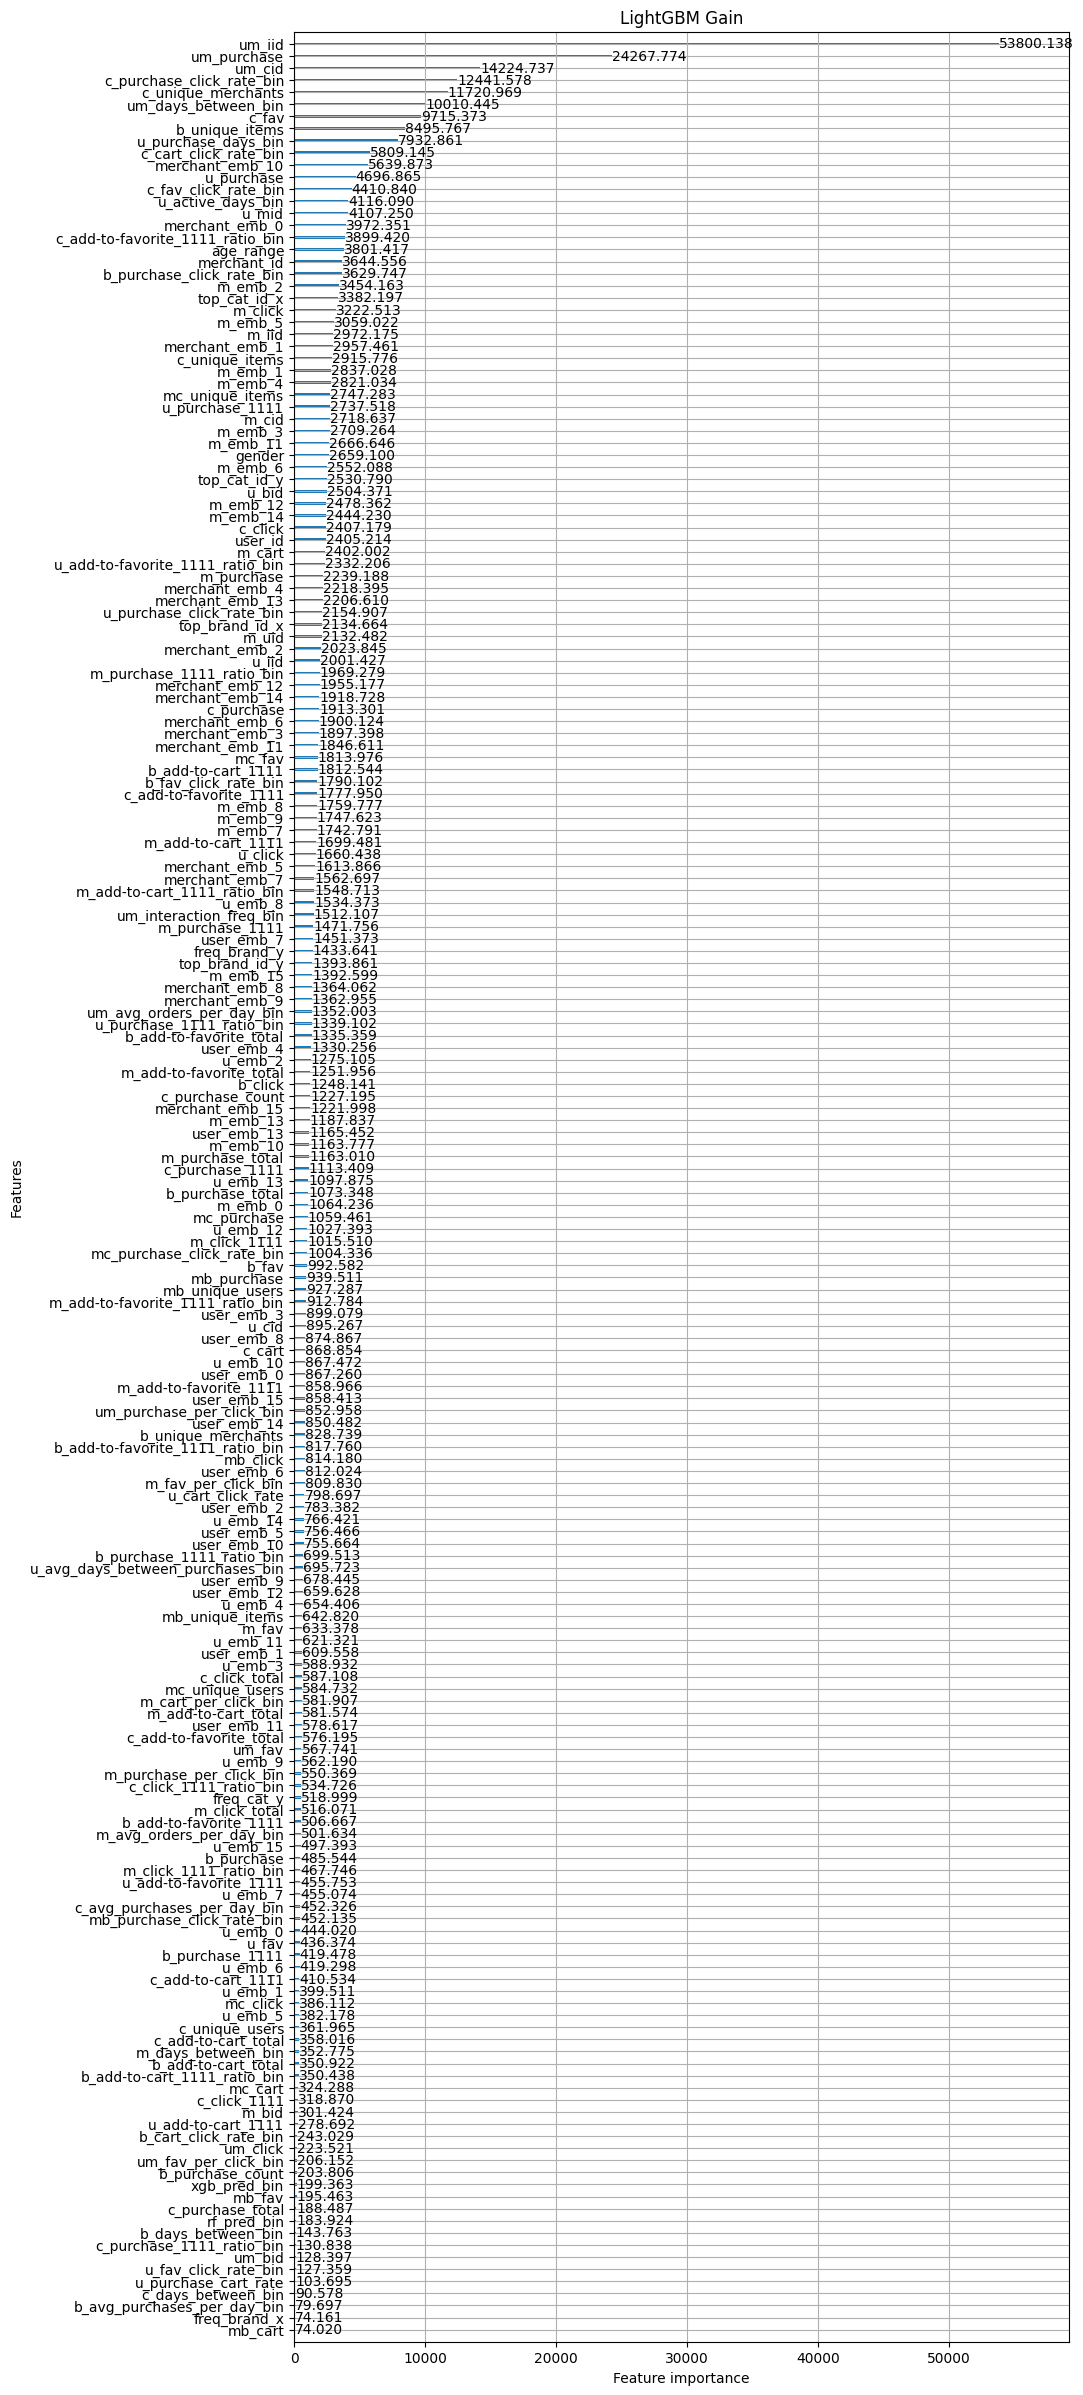

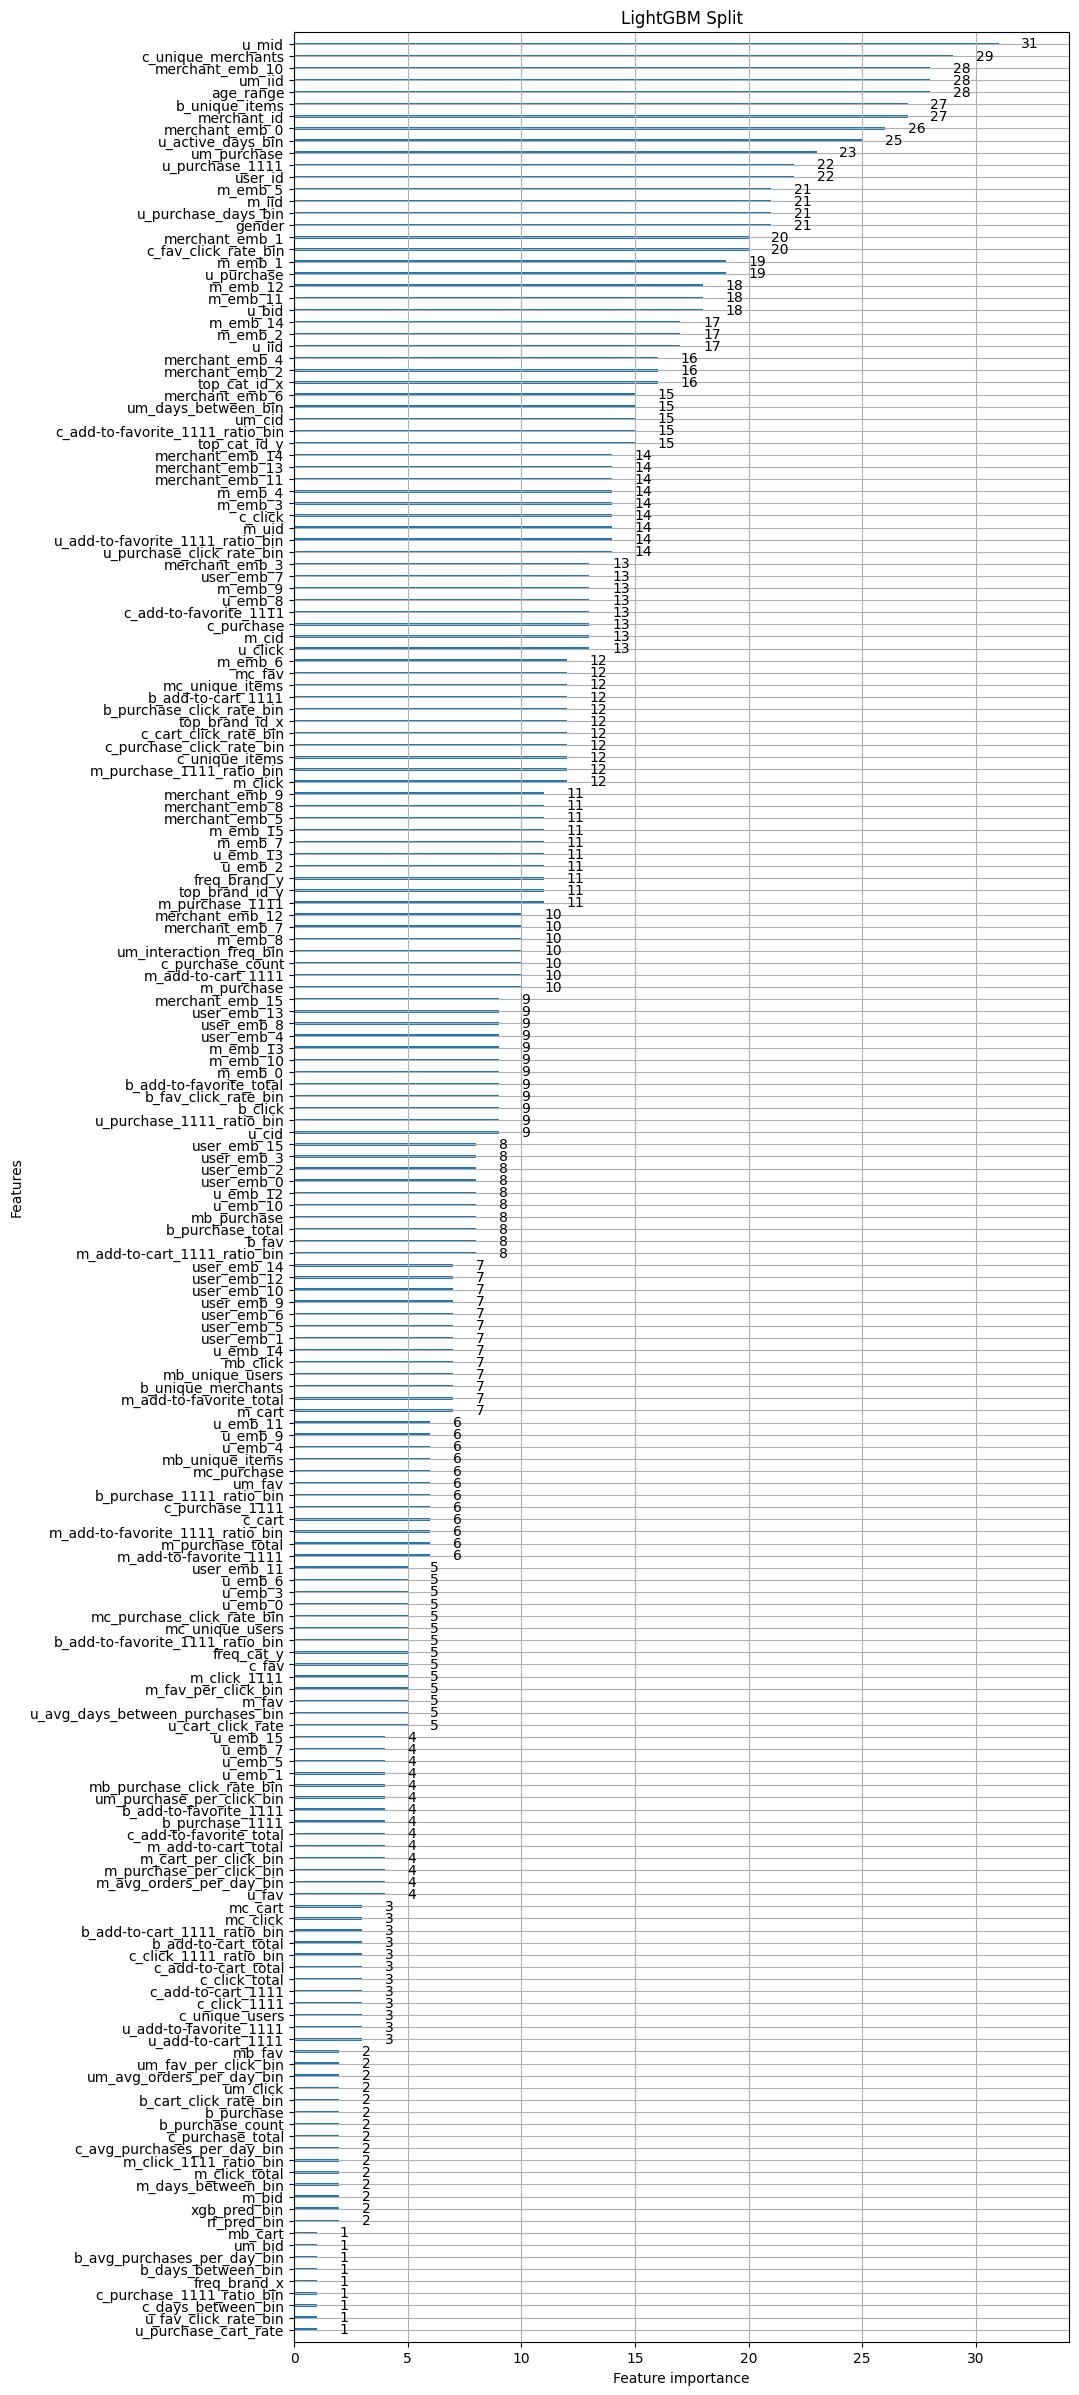

In [ ]:
# 获取训练好的 LightGBM Booster 对象
booster = my_model.get_booster()

# Plot gain of each feature
fig, ax = plt.subplots(figsize=(10, 30))
lgb.plot_importance(booster, max_num_features=200, ax=ax, importance_type='gain')
plt.title('LightGBM Gain')
plt.show()

# Plot split of each feature
fig, ax = plt.subplots(figsize=(10, 30))
lgb.plot_importance(booster, max_num_features=200, ax=ax, importance_type='split')
plt.title('LightGBM Split')
plt.show()

In [ ]:
my_model.save_predictions(origin_data, '../submission/submission.csv')

Submission file saved to ../submission/submission.csv
